In [146]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report, roc_curve, auc
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [148]:
data= pd.read_csv("C:/Users/ROHIT KUMAR/Downloads/diabetes.csv")

In [150]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [152]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [154]:
#Dropping NAN values
data = data.dropna()

<Axes: >

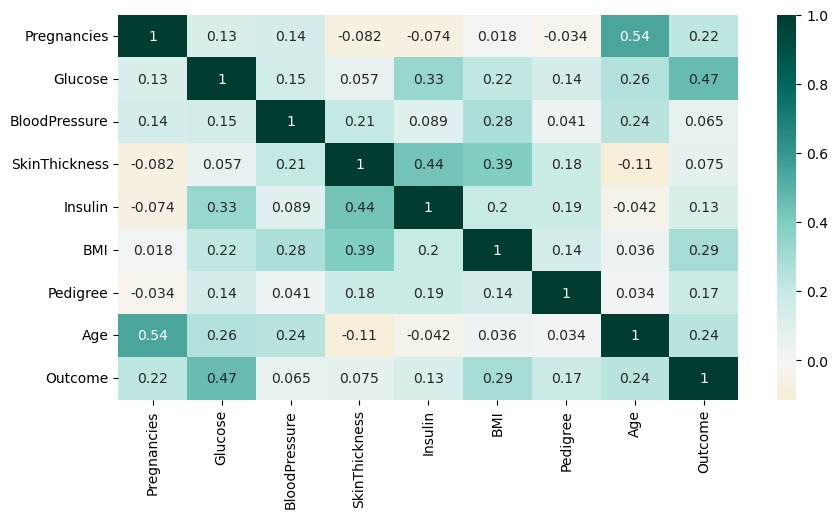

In [156]:
corr_matrix=data.corr()
plt.figure(1, figsize=(10,5))
sns.heatmap(corr_matrix, cmap='BrBG', center=0, annot=True)

In [158]:
#Segregating into 5 categories based on age

def categorize_age(age):
  if age < 25:
    return 0
  elif 25 <= age < 36:
    return 1
  elif 36 <= age < 50:
    return 2
  elif 50 <= age < 70:
    return 3
  else:
    return 4

data['Age'] = data['Age'].apply(categorize_age)

In [160]:
#Classifying people based on BMI

def categorize_bmi(bmi):
  if 18.5 <= bmi < 25:
    return 1
  elif 25 <= age < 30:
    return 2
  elif age < 30:
    return 3
  else:
    return 0

data['BMI'] = data['BMI'].apply(categorize_age)

In [162]:
X = data.drop(['Outcome','Pregnancies'],axis =1)
Y = data['Outcome']

In [164]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=13)

In [197]:
k = 3

In [207]:
kn = KNeighborsClassifier(n_neighbors=k)
kn.fit(X_train,y_train)
y_pred = kn.predict(X_test)
y_prob = kn.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 66.37931034482759


In [170]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[55 13]
 [28 20]]


In [172]:
# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.81      0.73        68
           1       0.61      0.42      0.49        48

    accuracy                           0.65       116
   macro avg       0.63      0.61      0.61       116
weighted avg       0.64      0.65      0.63       116



In [199]:
# Initialize lists for ROC curve data
fpr = {}
tpr = {}
roc_auc = {}

In [209]:
# Compute ROC curve for each class (one-vs-rest approach)
n_classes = len(np.unique(Y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

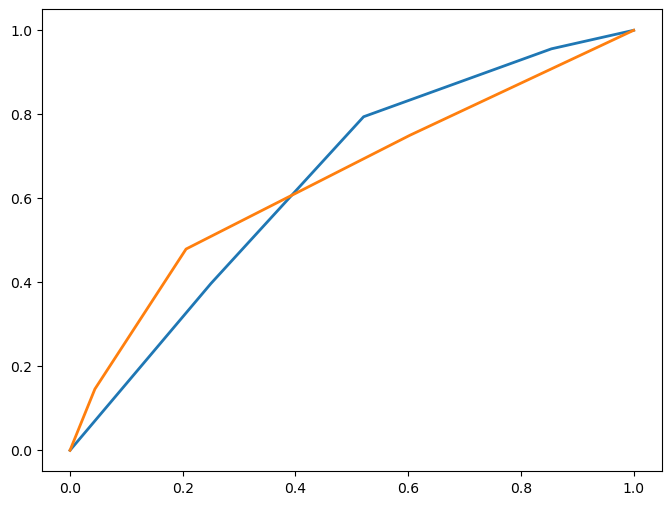

In [211]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

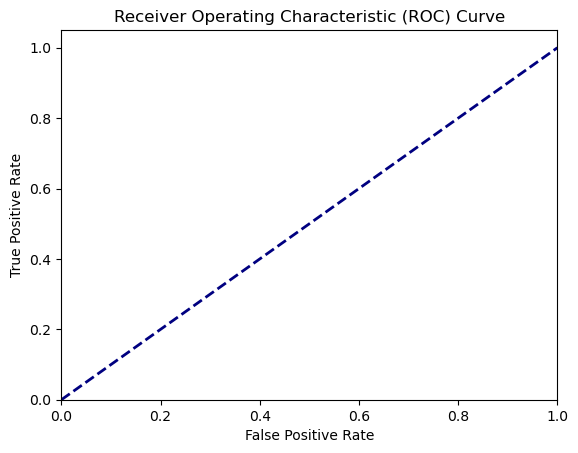

In [215]:
# Plot the random classifier line (diagonal)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [221]:
#Cross-validation with the model (using 10-fold cross-validation)
cv_scores = cross_val_score(kn, X_scaled, Y, cv=10, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Cross-validation Accuracy: {np.mean(cv_scores):.2f}")

Cross-validation scores: [0.7012987  0.7012987  0.67532468 0.71428571 0.72727273 0.76623377
 0.74025974 0.77922078 0.71052632 0.75      ]
Mean Cross-validation Accuracy: 0.73
